In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import optimize
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

<span style="color:brown">

### **LOAD DATA**

<span style="color:orange">

load data in for stars and planets from csv files. filter the data.

<span style="color:olive">

**planets**

In [2]:
p_conf = pd.read_csv("kepler_conf.csv")#,skiprows=99)
p_conf.head(3)

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,2MASS J19383260+4603591 b,2MASS J19383260+4603591,b,NaN,NaN,TIC 271164763,Gaia DR2 2080063931448749824,1,2,3,...,4/19/2022,2022-04,4/19/2022,1,0,0,0,0,0,0
1,KIC 10001893 b,KIC 10001893,b,NaN,NaN,TIC 158488181,Gaia DR2 2130473176626619136,1,1,3,...,10/3/2014,2014-10,10/3/2014,1,0,0,0,0,0,0
2,KIC 10001893 c,KIC 10001893,c,NaN,NaN,TIC 158488181,Gaia DR2 2130473176626619136,1,1,3,...,10/3/2014,2014-10,10/3/2014,1,0,0,0,0,0,0


In [3]:
p_cand = pd.read_csv("kepler_cand.csv")#,skiprows=55)
p_cand.head(3)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,10811496,K00753.01,NaN,CANDIDATE,Done,8/16/2018,CANDIDATE,0.000,0,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
1,11818800,K00777.01,NaN,CANDIDATE,Done,8/16/2018,CANDIDATE,0.999,0,0,...,0.051,0.076,0.057,0.077,-0.049,0.071,-0.021,0.075,0.053,0.072
2,11918099,K00780.02,NaN,CANDIDATE,Done,8/16/2018,CANDIDATE,0.993,0,0,...,-0.490,0.640,0.710,0.540,0.080,0.450,-0.380,0.560,0.390,0.560


In [4]:
# filter: period is under 50 days
p_conf = p_conf[p_conf["pl_orbper"]<50]
p_cand = p_cand[p_cand["koi_period"]<50]

<span style="color:olive">

**stars**

In [5]:
star = pd.read_csv("kepler_star.csv")
star.head(3)

,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh,feh_err1,...,timeout06p0,timeout07p5,timeout09p0,timeout10p5,timeout12p0,timeout12p5,timeout15p0,timeoutsumry,cdppslplong,cdppslpshrt
0,10000785,2MASS J19065600+4658027,5333,177.0,-161.0,4.616,0.072,-0.048,-1.00,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.25258,0.18226
1,10000797,2MASS J19065719+4658415,6289,170.0,-207.0,4.270,0.185,-0.185,-0.44,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.40036,-0.70925
2,10000800,2MASS J19065751+4657575,5692,152.0,-169.0,4.547,0.035,-0.184,-0.04,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.16887,-0.54197


In [6]:
star_corr = pd.read_csv("kepler_corr.csv")
star_corr.head(3)

,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh,feh_err1,...,timeout06p0,timeout07p5,timeout09p0,timeout10p5,timeout12p0,timeout12p5,timeout15p0,timeoutsumry,cdppslplong,cdppslpshrt
0,891916,2MASS J19234997+3641118,5602,167,-151,4.587,0.051,-0.119,-0.58,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2285040,2MASS J19063609+3739006,5941,195,-195,4.405,0.128,-0.192,-0.36,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2285109,2MASS J19064119+3741168,6056,182,-182,3.572,0.360,-0.120,-0.40,0.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# combine the stars dataframes, overwriting existing data with corrections
star.update(star_corr)

In [8]:
# filter: Teff 4100-6100 K, log g 4.0-4.9, Kp mag < 15
star = star[(star["teff"]>=4100)&(star["teff"]<=6100)]
star = star[(star["logg"]>=4.0)&(star["logg"]<=4.9)]
star = star[star["kmag"]<15]

<span style="color:brown">

### **FIGURE 5**

<span style="color:orange">

planet occurance as function of planet radius

In [9]:
def power(p,x):
    return p[0]*x**(p[1])

def other_power(p,x):
    return p[0]*x**(p[1])*(1-np.exp(-(x/p[2])**(p[3])))

def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err

def data_fit(p0, func, xvar, yvar, err, tmi=0):
    try:
        fit = optimize.least_squares(residual, p0, args=(func,xvar, yvar, err), verbose=tmi)
    except Exception as error:
        print("Something has gone wrong:",error)
        return p0, np.zeros_like(p0), np.nan, np.nan
    pf = fit['x']

    print()

    try:
        cov = np.linalg.inv(fit['jac'].T.dot(fit['jac']))          
        # This computes a covariance matrix by finding the inverse of the Jacobian times its transpose
        # We need this to find the uncertainty in our fit parameters
    except:
        # If the fit failed, print the reason
        print('Fit did not converge')
        print('Result is likely a local minimum')
        print('Try changing initial values')
        print('Status code:', fit['status'])
        print(fit['message'])
        return pf, np.zeros_like(pf), np.nan, np.nan
            #You'll be able to plot with this, but it will not be a good fit.

    chisq = sum(residual(pf, func, xvar, yvar, err) **2)
    dof = len(xvar) - len(pf)
    red_chisq = chisq/dof
    pferr = np.sqrt(np.diagonal(cov)) # finds the uncertainty in fit parameters by squaring diagonal elements of the covariance matrix
    print('Converged with chi-squared {:.2f}'.format(chisq))
    print('Number of degrees of freedom, dof = {:.2f}'.format(dof))
    print('Reduced chi-squared {:.2f}'.format(red_chisq))
    print()
    Columns = ["Parameter #","Initial guess values:", "Best fit values:", "Uncertainties in the best fit values:"]
    print('{:<11}'.format(Columns[0]),'|','{:<24}'.format(Columns[1]),"|",'{:<24}'.format(Columns[2]),"|",'{:<24}'.format(Columns[3]))
    for num in range(len(pf)):
        print('{:<11}'.format(num),'|','{:<24.3e}'.format(p0[num]),'|','{:<24.3e}'.format(pf[num]),'|','{:<24.3e}'.format(pferr[num]))
    return pf, pferr, chisq,dof

0.0905 +/- 0.0039
0.1008 +/- 0.0045
0.0830 +/- 0.0043
0.0336 +/- 0.0027
0.0158 +/- 0.0020
0.0072 +/- 0.0011
0.0070 +/- 0.0012
0.0087 +/- 0.0012
0.0049 +/- 0.0009
0.0041 +/- 0.0008
0.0013 +/- 0.0005
0.0010 +/- 0.0004

Converged with chi-squared 84.03
Number of degrees of freedom, dof = 8.00
Reduced chi-squared 10.50

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 2.900e+00                | 3.173e-01                | 3.517e-02               
1           | -1.920e+00               | -1.756e+00               | 7.932e-02               


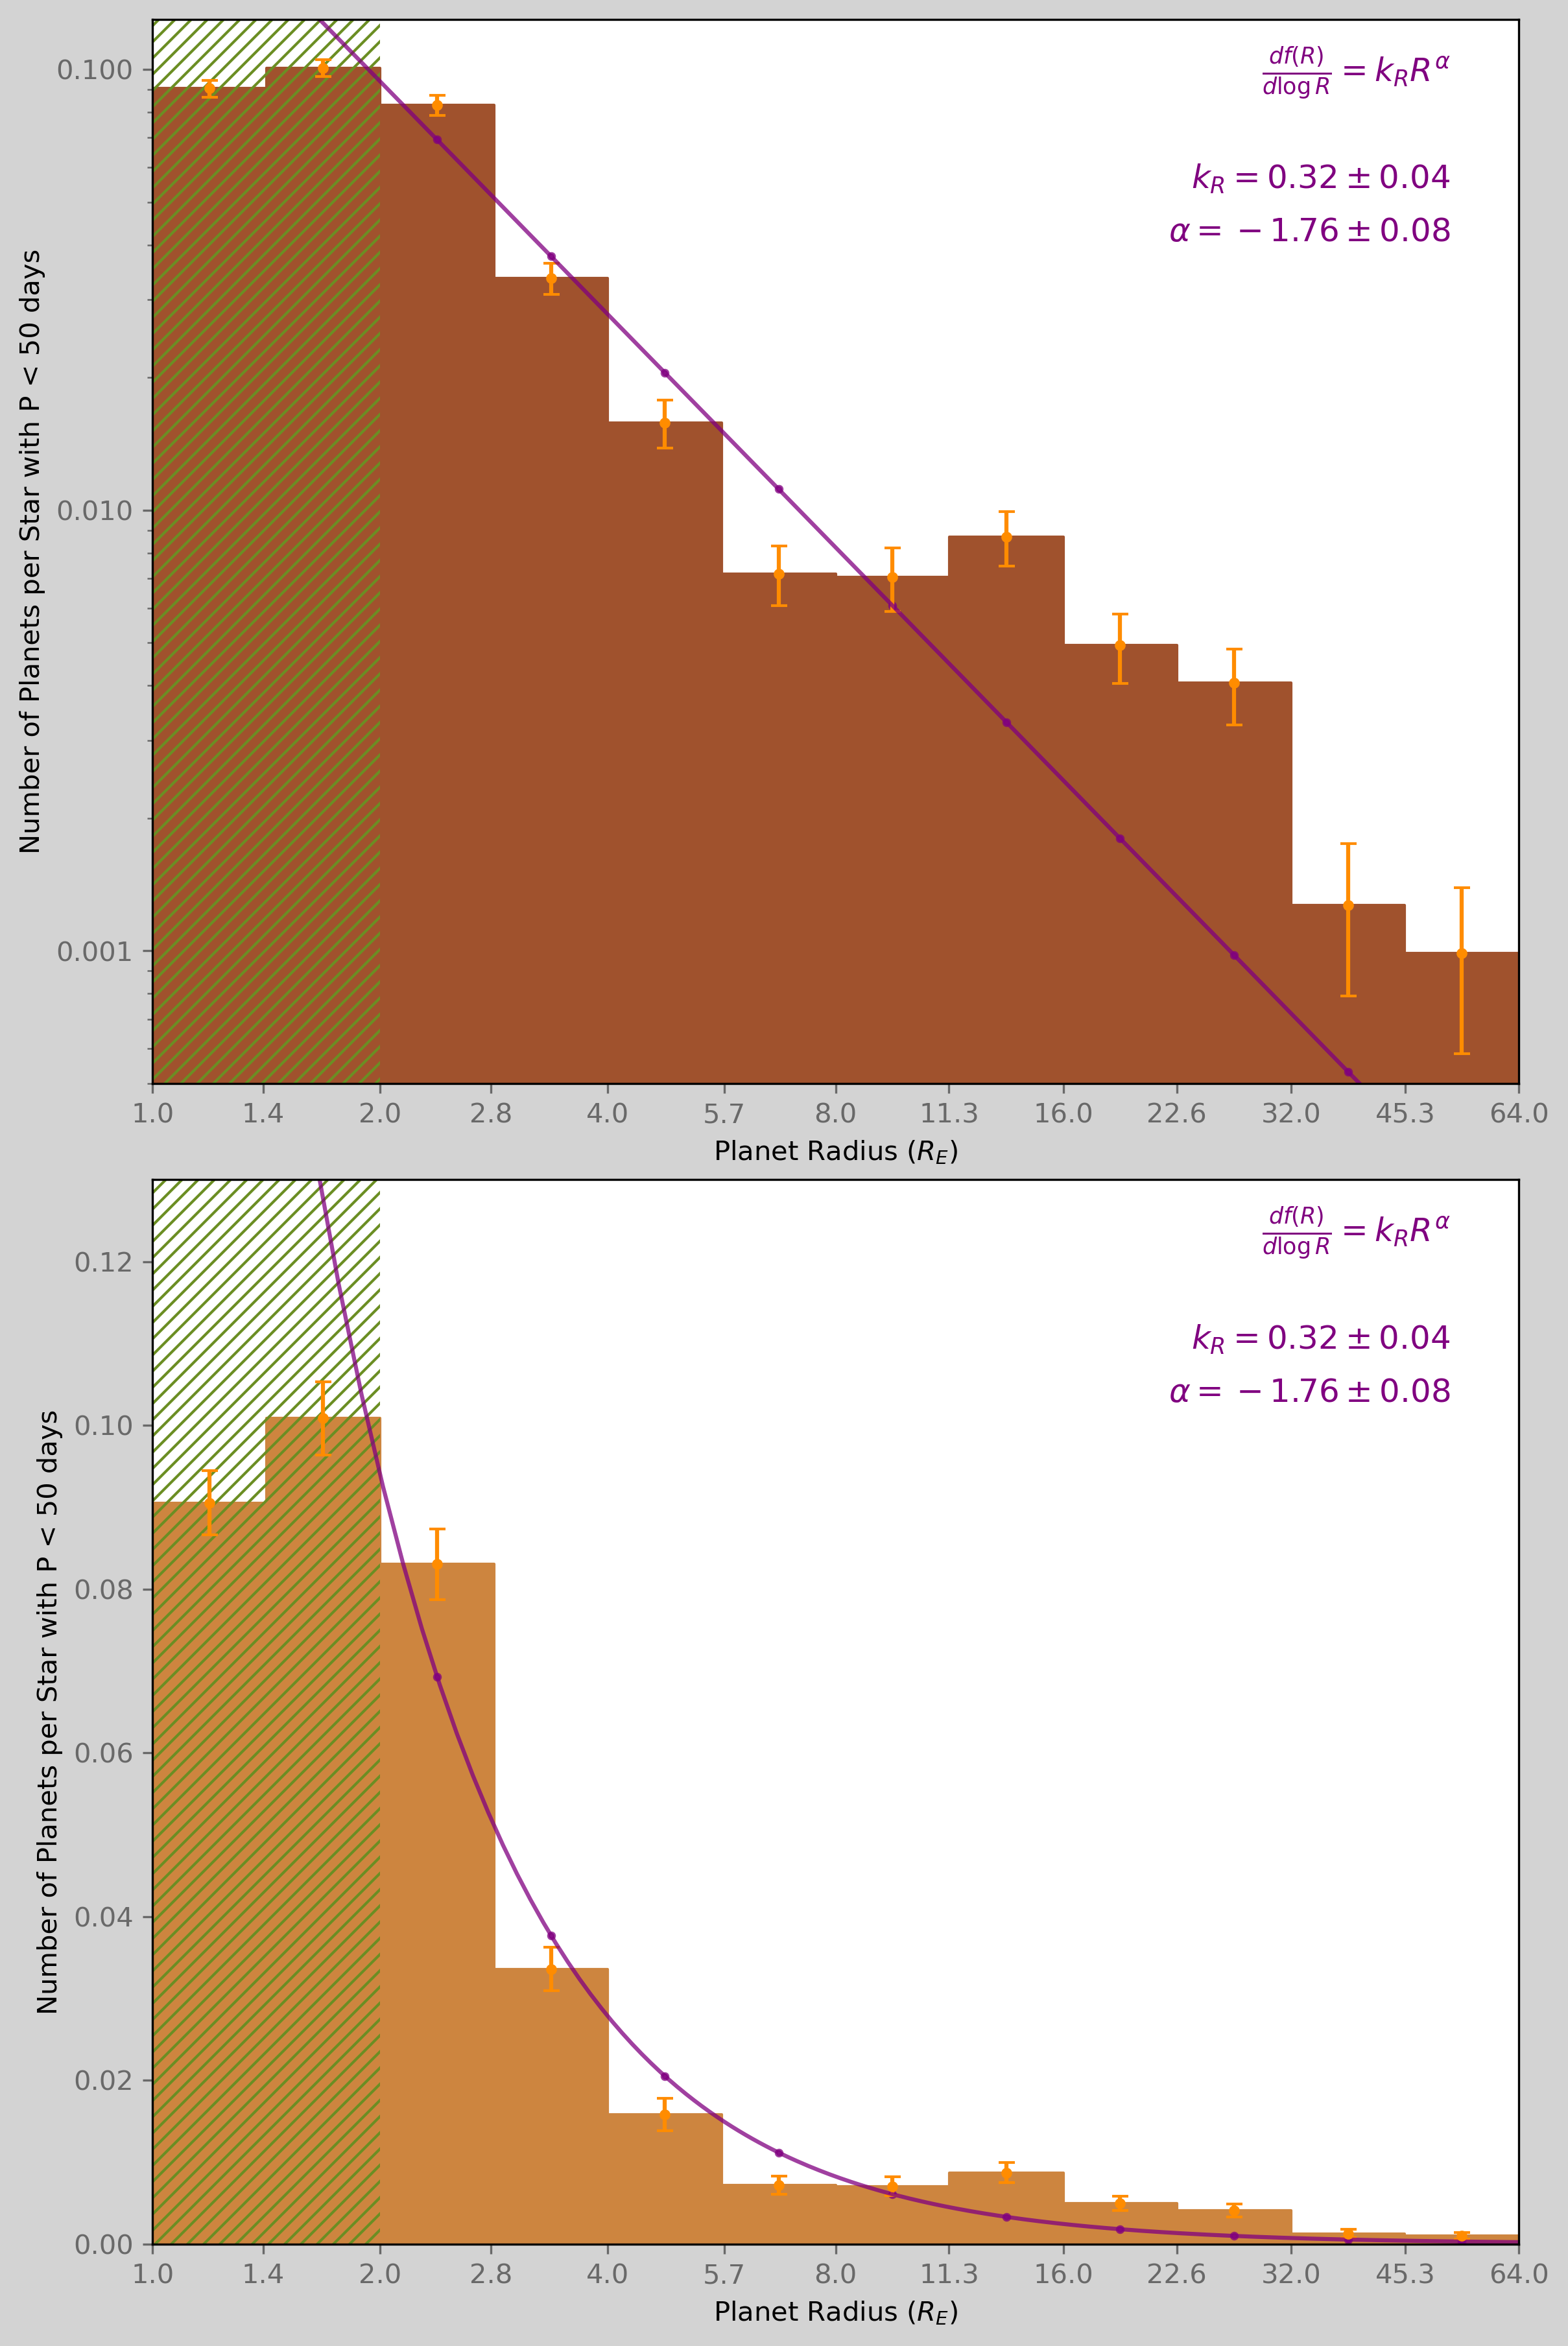

In [10]:
planet_rad = pd.concat((p_conf["pl_rade"],p_cand["koi_prad"]))
planet_prob = 1./pd.concat(((p_conf["st_rad"]*0.00465047)/(p_conf["pl_orbsmax"]),(p_cand["koi_srad"]*0.00465047)/(p_cand["koi_sma"])))
# logrange = np.logspace(0,7,15,base=2)
logrange = np.logspace(0,6,13,base=2)
# logrange = np.logspace(0,4.5,10,base=2)

fig,ax = plt.subplots(2,1,figsize = (8,12), dpi=300)
fig.set_facecolor("lightgray")
ax[0].set_xlabel("Planet Radius ($R_E$)")
ax[0].set_ylabel("Number of Planets per Star with P < 50 days")
ax[1].set_xlabel("Planet Radius ($R_E$)")
ax[1].set_ylabel("Number of Planets per Star with P < 50 days")


ctrs = []
nums = []
uncs = []
for i,bin in enumerate(logrange[:-1]):
    mask = (planet_rad>=logrange[i])&(planet_rad<logrange[i+1])&(~np.isnan(planet_prob))&(~np.isnan(planet_rad))
    new_binned = planet_prob[mask]
    num = np.sum(new_binned)/len(star)
    # z score is 1!
    # probably = draw n planets from n stars
    unc = np.sqrt(num*(1-num)/(len(new_binned)/num))
    print(f"{num:.4f} +/- {unc:.4f}")
    
    ax[0].fill_between([logrange[i],logrange[i+1]],[0,0],[num,num],color="sienna")
    ax[1].fill_between([logrange[i],logrange[i+1]],[0,0],[num,num],color="peru")
    ax[0].errorbar(scipy.stats.gmean([logrange[i],logrange[i+1]]),num,yerr=unc,capsize=3,color="darkorange",marker=".",ls="none")
    ax[1].errorbar(scipy.stats.gmean([logrange[i],logrange[i+1]]),num,yerr=unc,capsize=3,color="darkorange",marker=".",ls="none")

    ctrs.append(scipy.stats.gmean([logrange[i],logrange[i+1]]))
    nums.append(num)
    uncs.append(unc)
ctrs = np.array(ctrs[2:])
nums = np.array(nums[2:])
uncs = np.array(uncs[2:])

p0 = [2.9,-1.92]
pf, pferr, chisq, dof = data_fit(p0,power,ctrs,nums,uncs)

ax[0].scatter(ctrs,power(pf,ctrs),color="purple",alpha=0.75,s=5)
ax[0].plot(np.linspace(1,128,1000),power(pf,np.linspace(1,128,1000)),color="purple",alpha=0.75)

ax[0].text(0.95,0.95,'$\\frac{{df(R)}}{{d\\log{{R}}}} = k_R R^{{\\alpha}}$',
           transform=ax[0].transAxes,fontsize=12,ha="right",va="center",color="purple")
ax[0].text(0.95,0.85,'$k_R = {:.2f} \\pm {:.2f}$'.format(pf[0],pferr[0]),
           transform=ax[0].transAxes,fontsize=12,ha="right",va="center",color="purple")
ax[0].text(0.95,0.8,'$\\alpha = {:.2f} \\pm {:.2f}$'.format(pf[1],pferr[1]),
           transform=ax[0].transAxes,fontsize=12,ha="right",va="center",color="purple")



ax[1].scatter(ctrs,power(pf,ctrs),color="purple",alpha=0.75,s=5)
ax[1].plot(np.linspace(1,128,1000),power(pf,np.linspace(1,128,1000)),color="purple",alpha=0.75)

ax[1].text(0.95,0.95,'$\\frac{{df(R)}}{{d\\log{{R}}}} = k_R R^{{\\alpha}}$',
           transform=ax[1].transAxes,fontsize=12,ha="right",va="center",color="purple")
ax[1].text(0.95,0.85,'$k_R = {:.2f} \\pm {:.2f}$'.format(pf[0],pferr[0]),
           transform=ax[1].transAxes,fontsize=12,ha="right",va="center",color="purple")
ax[1].text(0.95,0.8,'$\\alpha = {:.2f} \\pm {:.2f}$'.format(pf[1],pferr[1]),
           transform=ax[1].transAxes,fontsize=12,ha="right",va="center",color="purple")

ax[0].axvspan(1,2,color="olivedrab",hatch="////",fill=False,lw=0)
ax[1].axvspan(1,2,color="olivedrab",hatch="////",fill=False,lw=0)


ax[0].set_xscale('log')
ax[0].set_xticks(np.round(logrange,1))
ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[0].set_xlim(min(logrange),max(logrange))
ax[0].minorticks_off()
ax[1].set_xscale('log')
ax[1].set_xticks(np.round(logrange,1))
ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[1].set_xlim(min(logrange),max(logrange))
ax[1].minorticks_off()

ax[0].set_yscale('log')
ax[0].set_ylim(5e-4,.13)
ax[0].yaxis.set_major_formatter(plt.ScalarFormatter())
ax[0].ticklabel_format(style='plain', axis='y')
ax[1].set_ylim(0,.13)

ax[0].tick_params(colors='dimgrey', which='both')
ax[1].tick_params(colors='dimgrey', which='both')

plt.tight_layout(pad=0.5)
plt.savefig("5.png",dpi=500)
plt.show()

0.0005 +/- 0.0001
0.0012 +/- 0.0002
0.0028 +/- 0.0005
0.0094 +/- 0.0010
0.0195 +/- 0.0017
0.0335 +/- 0.0026
0.0436 +/- 0.0034
0.0579 +/- 0.0047


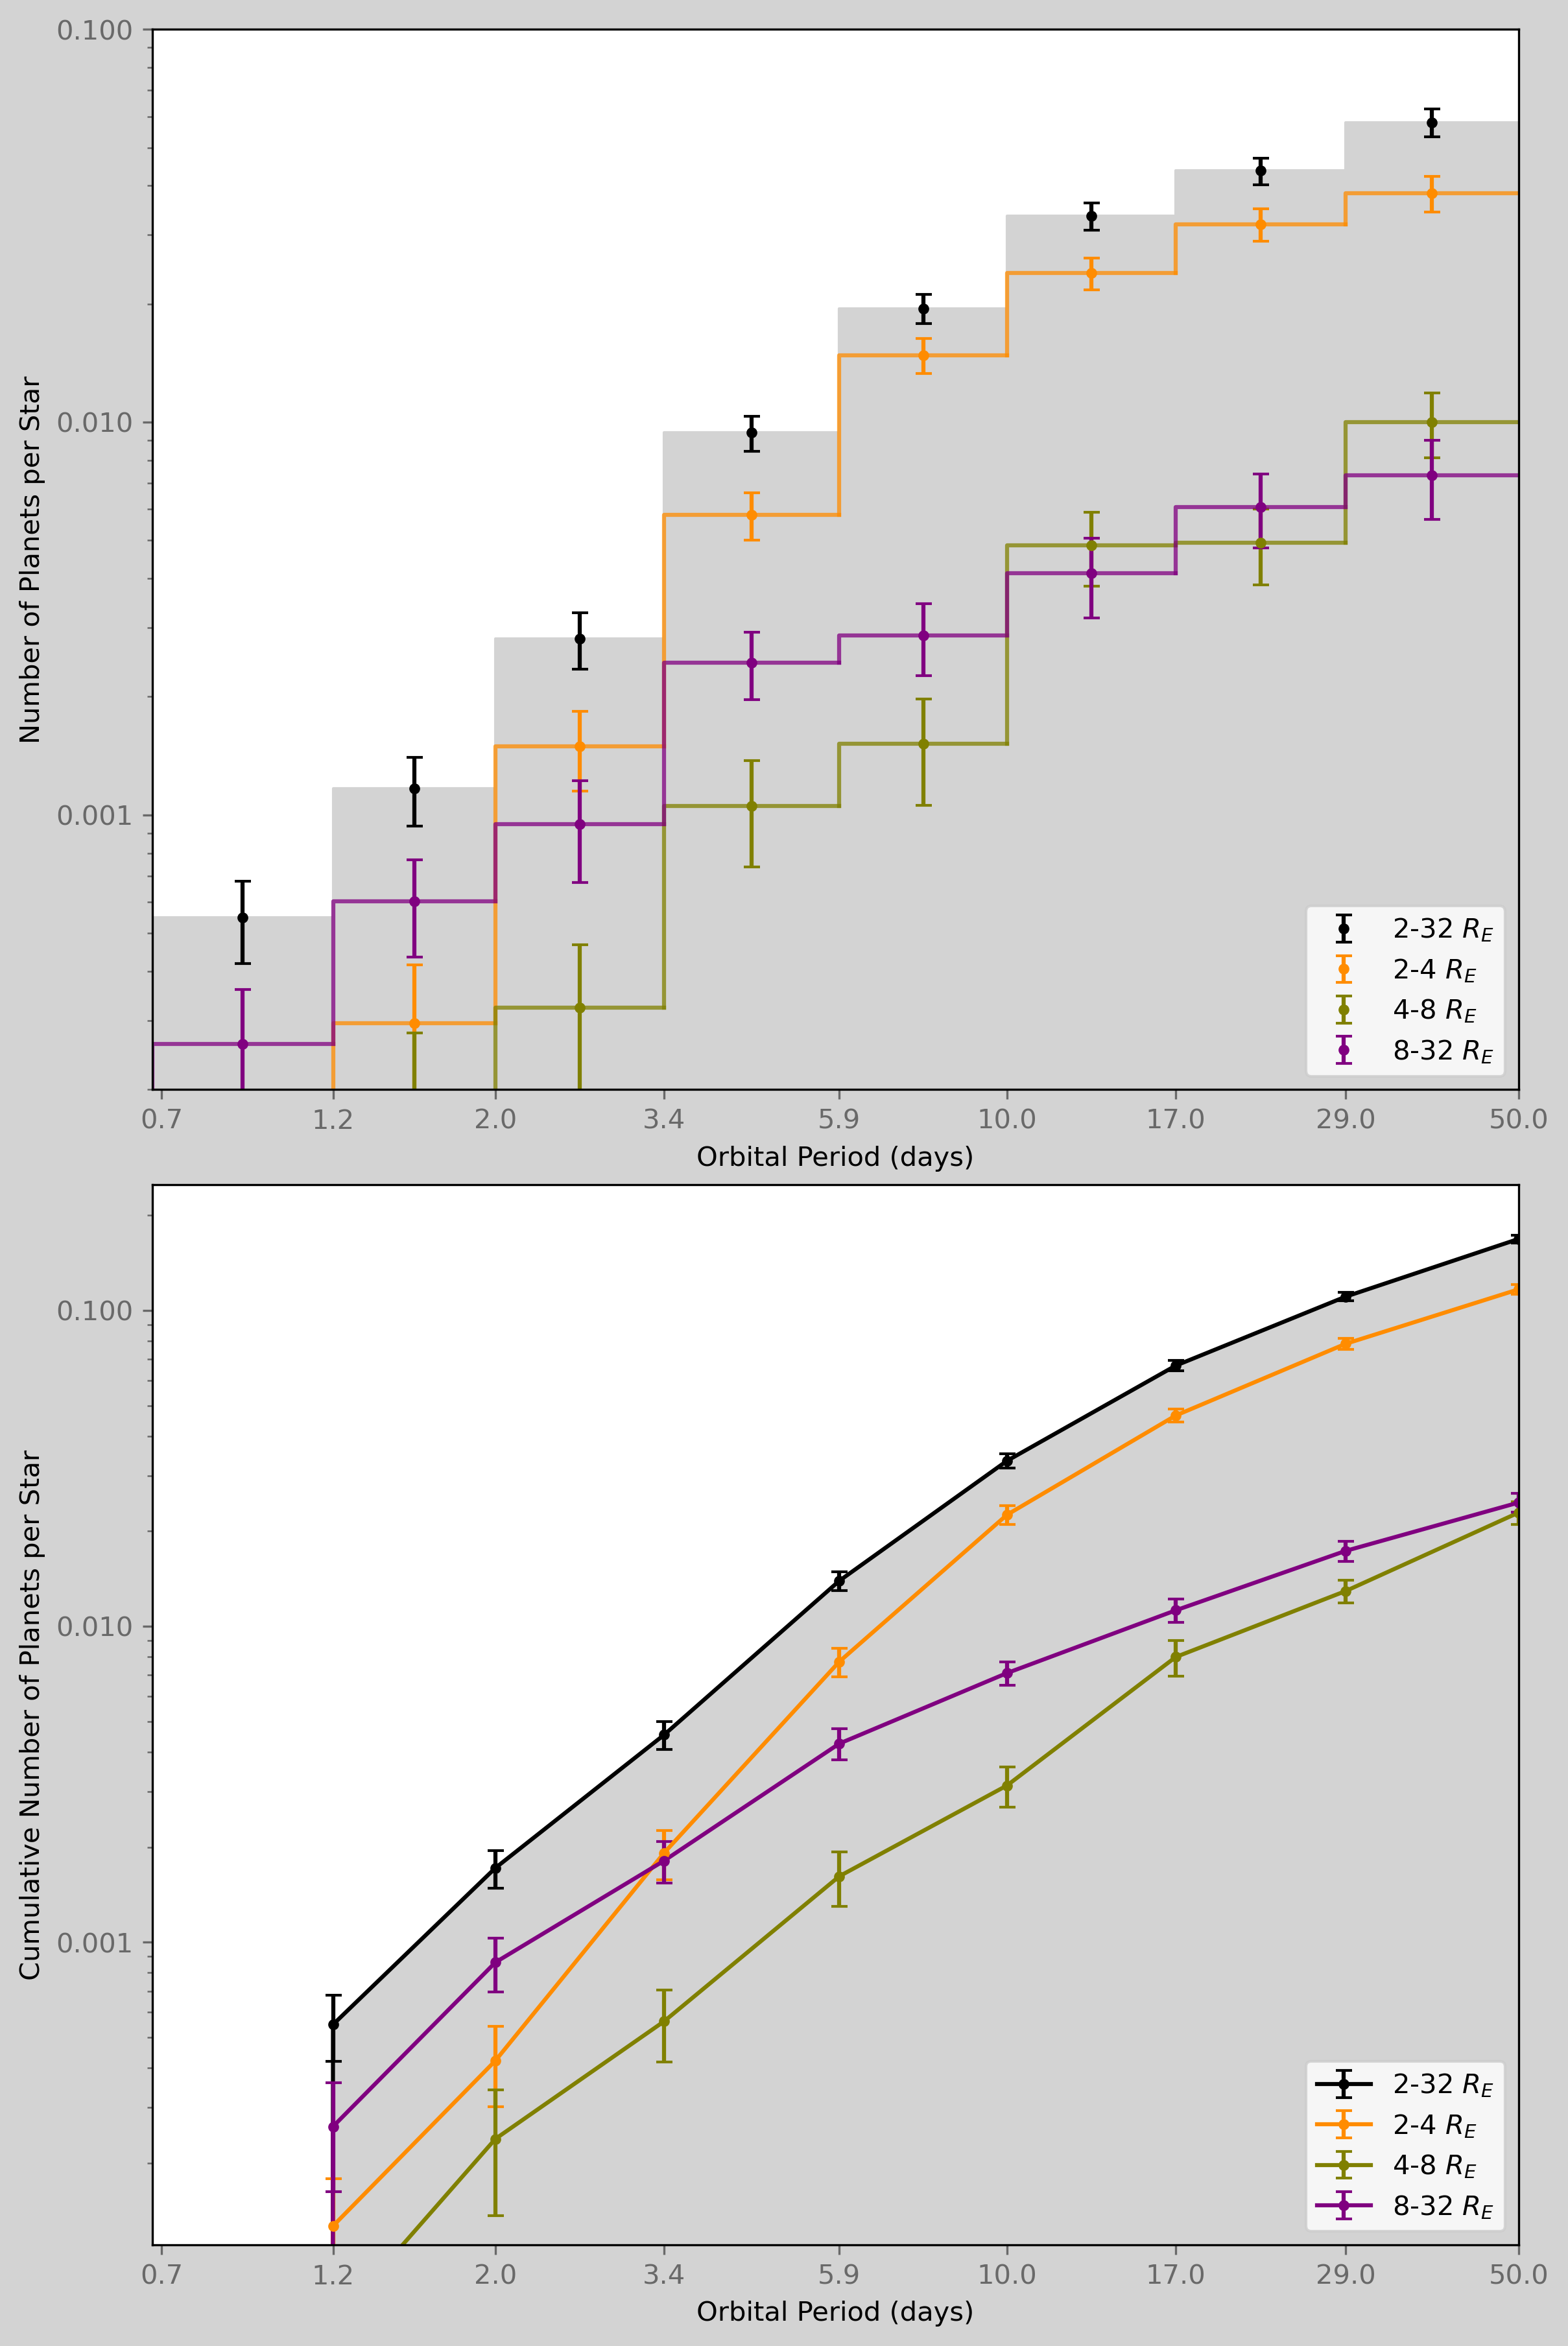

In [11]:
planet_rad = pd.concat((p_conf["pl_rade"],p_cand["koi_prad"]))
planet_per = pd.concat((p_conf["pl_orbper"],p_cand["koi_period"]))
planet_prob = 1./pd.concat(((p_conf["st_rad"]*0.00465047)/(p_conf["pl_orbsmax"]),(p_cand["koi_srad"]*0.00465047)/(p_cand["koi_sma"])))
logrange = np.array([0.68,1.2,2.0,3.4,5.9,10,17,29,50])
radrange = np.array([2,4,8,32])

fig,ax = plt.subplots(2,1,figsize = (8,12), dpi=300)
fig.set_facecolor("lightgray")
ax[0].set_xlabel("Orbital Period (days)")
ax[0].set_ylabel("Number of Planets per Star")
ax[1].set_xlabel("Orbital Period (days)")
ax[1].set_ylabel("Cumulative Number of Planets per Star")

nums_tot = 0
nums_ = [0,0,0]
for i,bin in enumerate(logrange[:-1]):
    mask = (planet_per>=logrange[i])&(planet_per<logrange[i+1])&(~np.isnan(planet_prob))&(planet_rad>=2)&(~np.isnan(planet_per))
    new_binned = planet_prob[mask]
    
    num = np.sum(new_binned)/len(star)
    nums_tot += num
    unc = np.sqrt(num*(1-num)/(len(new_binned)/num))
    print(f"{num:.4f} +/- {unc:.4f}")

    ax[0].fill_between([logrange[i],logrange[i+1]],[0,0],[num,num],color="lightgray")
    ax[1].fill_between([logrange[i],logrange[i+1]],[0,0],[nums_tot-num,nums_tot],color="lightgray")
    ax[1].plot([logrange[i],logrange[i+1]],[nums_tot-num,nums_tot],color="black")
    if i==len(logrange)-2:
        ax[0].errorbar(scipy.stats.gmean([logrange[i],logrange[i+1]]),num,yerr=unc,capsize=3,color="black",marker=".",ls="none",label="2-32 $R_E$")
        ax[1].errorbar(logrange[i+1],nums_tot,yerr=unc,capsize=3,color="black",marker=".",label="2-32 $R_E$")
    else:
        ax[0].errorbar(scipy.stats.gmean([logrange[i],logrange[i+1]]),num,yerr=unc,capsize=3,color="black",marker=".",ls="none")
        ax[1].errorbar(logrange[i+1],nums_tot,yerr=unc,capsize=3,color="black",marker=".")
    
    colors = ["darkorange","olive","purple"]
    labels = ["2-4 $R_E$","4-8 $R_E$","8-32 $R_E$"]

    for j,radbin in enumerate(radrange[:-1]):
        mask0 = mask&(planet_rad>=radrange[j])&(planet_rad<radrange[j+1])
        
        new_binned = planet_prob[mask0]
    
        num = np.sum(new_binned)/len(star)
        nums_.append(num)
        unc = np.sqrt(num*(1-num)/(len(new_binned)/num))
        
        ax[0].plot([logrange[i],logrange[i],logrange[i+1]],[nums_[i*3+j],num,num],color=colors[j],alpha=0.75)
        ax[1].plot([logrange[i],logrange[i+1]],[np.sum(nums_[j::3])-num,np.sum(nums_[j::3])],color=colors[j])
        if i==len(logrange)-2:
            ax[0].errorbar(scipy.stats.gmean([logrange[i],logrange[i+1]]),num,yerr=unc,capsize=3,color=colors[j],marker=".",ls="none",label=labels[j])
            ax[1].errorbar(logrange[i+1],np.sum(nums_[j::3]),yerr=unc,capsize=3,color=colors[j],marker=".",label=labels[j])
        else:
            ax[0].errorbar(scipy.stats.gmean([logrange[i],logrange[i+1]]),num,yerr=unc,capsize=3,color=colors[j],marker=".",ls="none")
            ax[1].errorbar(logrange[i+1],np.sum(nums_[j::3]),yerr=unc,capsize=3,color=colors[j],marker=".")    

ax[0].legend(loc="lower right")
ax[1].legend(loc="lower right")

ax[0].set_xscale('log')
ax[0].set_xticks(np.round(logrange,1))
ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[0].set_xlim(min(logrange),max(logrange))
ax[0].minorticks_off()
ax[1].set_xscale('log')
ax[1].set_xticks(np.round(logrange,1))
ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[1].set_xlim(min(logrange),max(logrange))
ax[1].minorticks_off()

ax[0].set_yscale('log')
ax[0].set_ylim(2e-4,.1)
ax[0].yaxis.set_major_formatter(plt.ScalarFormatter())
ax[0].ticklabel_format(style='plain', axis='y')
ax[1].set_yscale('log')
ax[1].set_ylim(1.1e-4,.25)
ax[1].yaxis.set_major_formatter(plt.ScalarFormatter())
ax[1].ticklabel_format(style='plain', axis='y')

ax[0].tick_params(colors='dimgrey', which='both')
ax[1].tick_params(colors='dimgrey', which='both')

plt.tight_layout(pad=0.5)
plt.savefig("6.png",dpi=500)
plt.show()


Converged with chi-squared 1.36
Number of degrees of freedom, dof = 4.00
Reduced chi-squared 0.34

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 5.000e-02                | 7.814e-03                | 3.156e-03               
1           | 5.000e-01                | 4.421e-01                | 1.297e-01               
2           | 5.000e+00                | 6.352e+00                | 9.758e-01               
3           | 5.000e+00                | 2.260e+00                | 2.029e-01               

Converged with chi-squared 3.66
Number of degrees of freedom, dof = 4.00
Reduced chi-squared 0.92

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 5.000e-02                | 3.346e-04                | 5.340e-04               
1           | 5.000e-01                | 9.183e-01                | 4.731e-01               
2           | 5.000e+00       

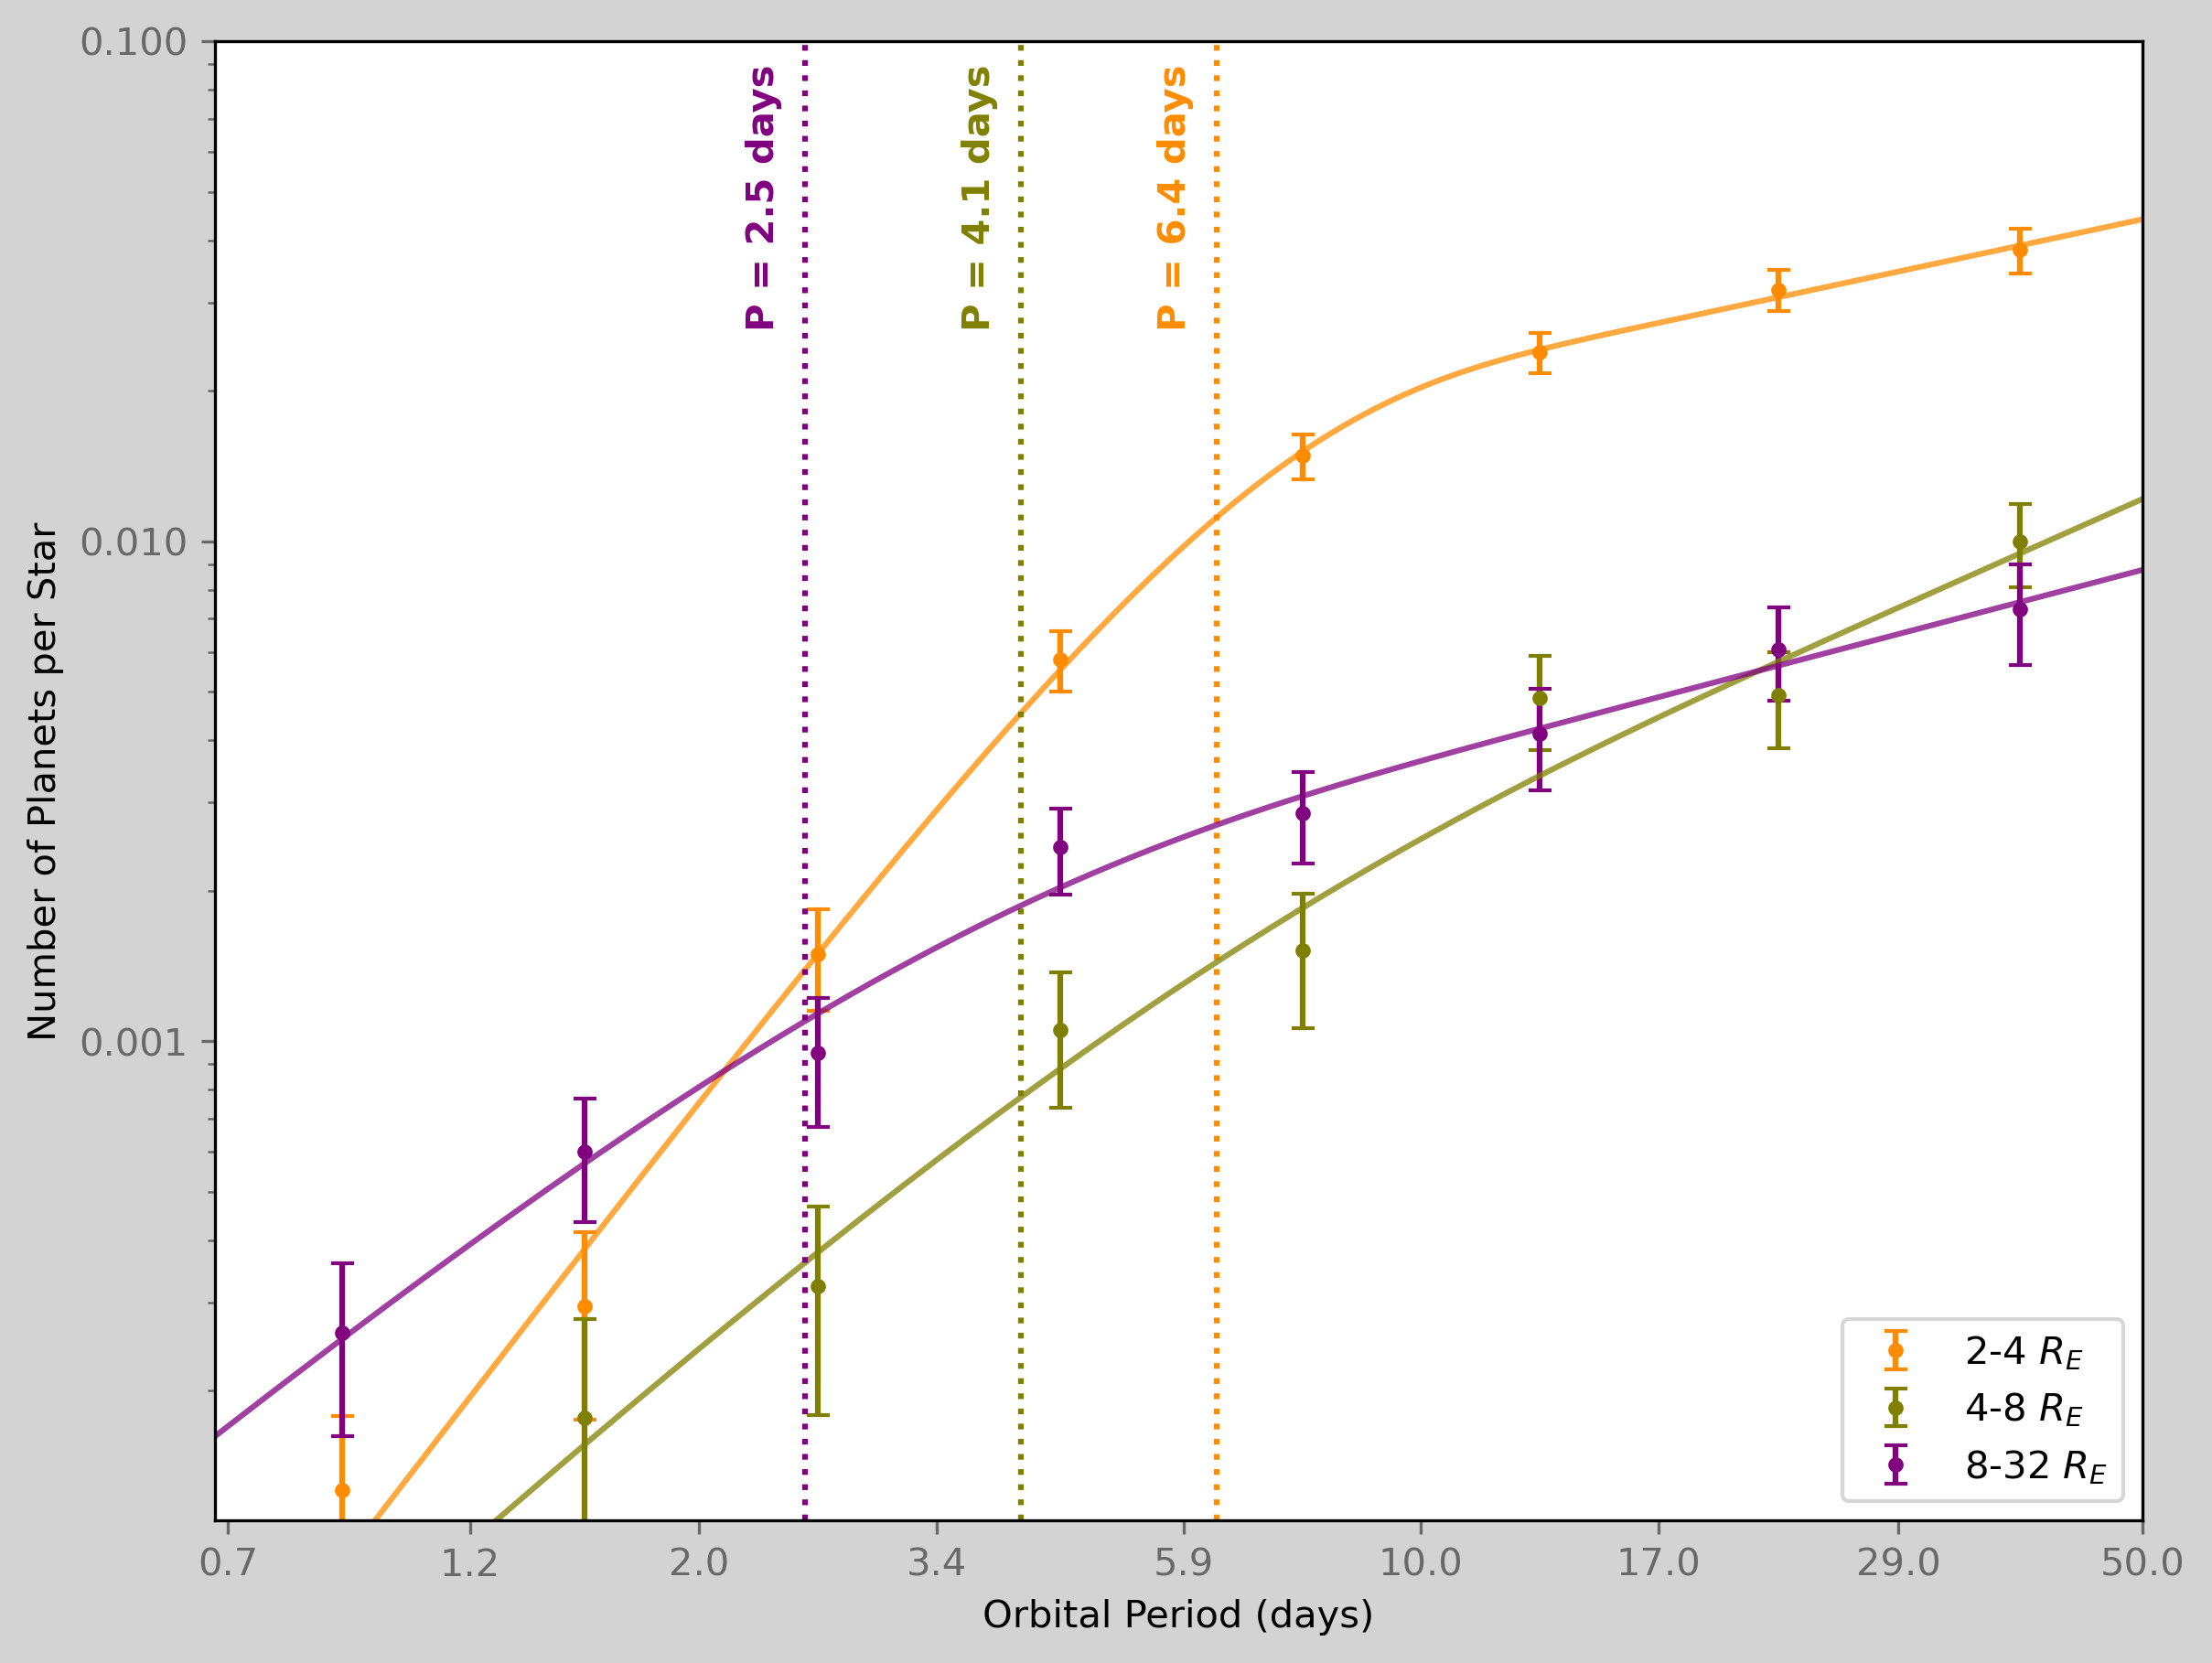

In [12]:
planet_rad = pd.concat((p_conf["pl_rade"],p_cand["koi_prad"]))
planet_per = pd.concat((p_conf["pl_orbper"],p_cand["koi_period"]))
planet_prob = 1./pd.concat(((p_conf["st_rad"]*0.00465047)/(p_conf["pl_orbsmax"]),(p_cand["koi_srad"]*0.00465047)/(p_cand["koi_sma"])))
logrange = np.array([0.68,1.2,2.0,3.4,5.9,10,17,29,50])
radrange = np.array([2,4,8,32])

fig,ax = plt.subplots(1,1,figsize = (8,6), dpi=300)
fig.set_facecolor("lightgray")
ax.set_xlabel("Orbital Period (days)")
ax.set_ylabel("Number of Planets per Star")

nums_tot = 0


ctrs = []
nums = []
uncs = []

nums_ = [0,0,0]
for i,bin in enumerate(logrange[:-1]):
    mask = (planet_per>=logrange[i])&(planet_per<logrange[i+1])&(~np.isnan(planet_prob))&(planet_rad>=2)&(~np.isnan(planet_per))&(~np.isnan(planet_rad))
    new_binned = planet_prob[mask]

    colors = ["darkorange","olive","purple"]
    labels = ["2-4 $R_E$","4-8 $R_E$","8-32 $R_E$"]

    for j,radbin in enumerate(radrange[:-1]):
        mask0 = mask&(planet_rad>=radrange[j])&(planet_rad<radrange[j+1])
        
        new_binned = planet_prob[mask0]
    
        num = np.sum(new_binned)/len(star)
        nums_.append(num)
        unc = np.sqrt(num*(1-num)/(len(new_binned)/num))

        ctrs.append(scipy.stats.gmean([logrange[i],logrange[i+1]]))
        nums.append(num)
        uncs.append(unc)
        
        if i==len(logrange)-2:
            ax.errorbar(scipy.stats.gmean([logrange[i],logrange[i+1]]),num,yerr=unc,capsize=3,color=colors[j],marker=".",ls="none",label=labels[j])
        else:
            ax.errorbar(scipy.stats.gmean([logrange[i],logrange[i+1]]),num,yerr=unc,capsize=3,color=colors[j],marker=".",ls="none")

for j in range(3):
    p0 = [0.05,0.5,5,5]
    pf, pferr, chisq, dof = data_fit(p0,other_power,ctrs[j::3],nums[j::3],uncs[j::3])
    
    ax.plot(np.linspace(0,50,1000),other_power(pf,np.linspace(0,50,1000)),color=colors[j],alpha=0.75)
    ax.axvline(pf[2],color=colors[j],ls=":")
    ax.text(pf[2]*0.95,0.09,f"P = {pf[2]:.1f} days",va="top",ha="right",rotation=90,color=colors[j],weight="bold")



ax.legend(loc="lower right")

ax.set_xscale('log')
ax.set_xticks(np.round(logrange,1))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlim(min(logrange),max(logrange))
ax.minorticks_off()

ax.set_yscale('log')
ax.set_ylim(1.1e-4,.1)
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

ax.tick_params(colors='dimgrey', which='both')

plt.tight_layout(pad=0.5)
plt.savefig("7.png",dpi=500)
plt.show()

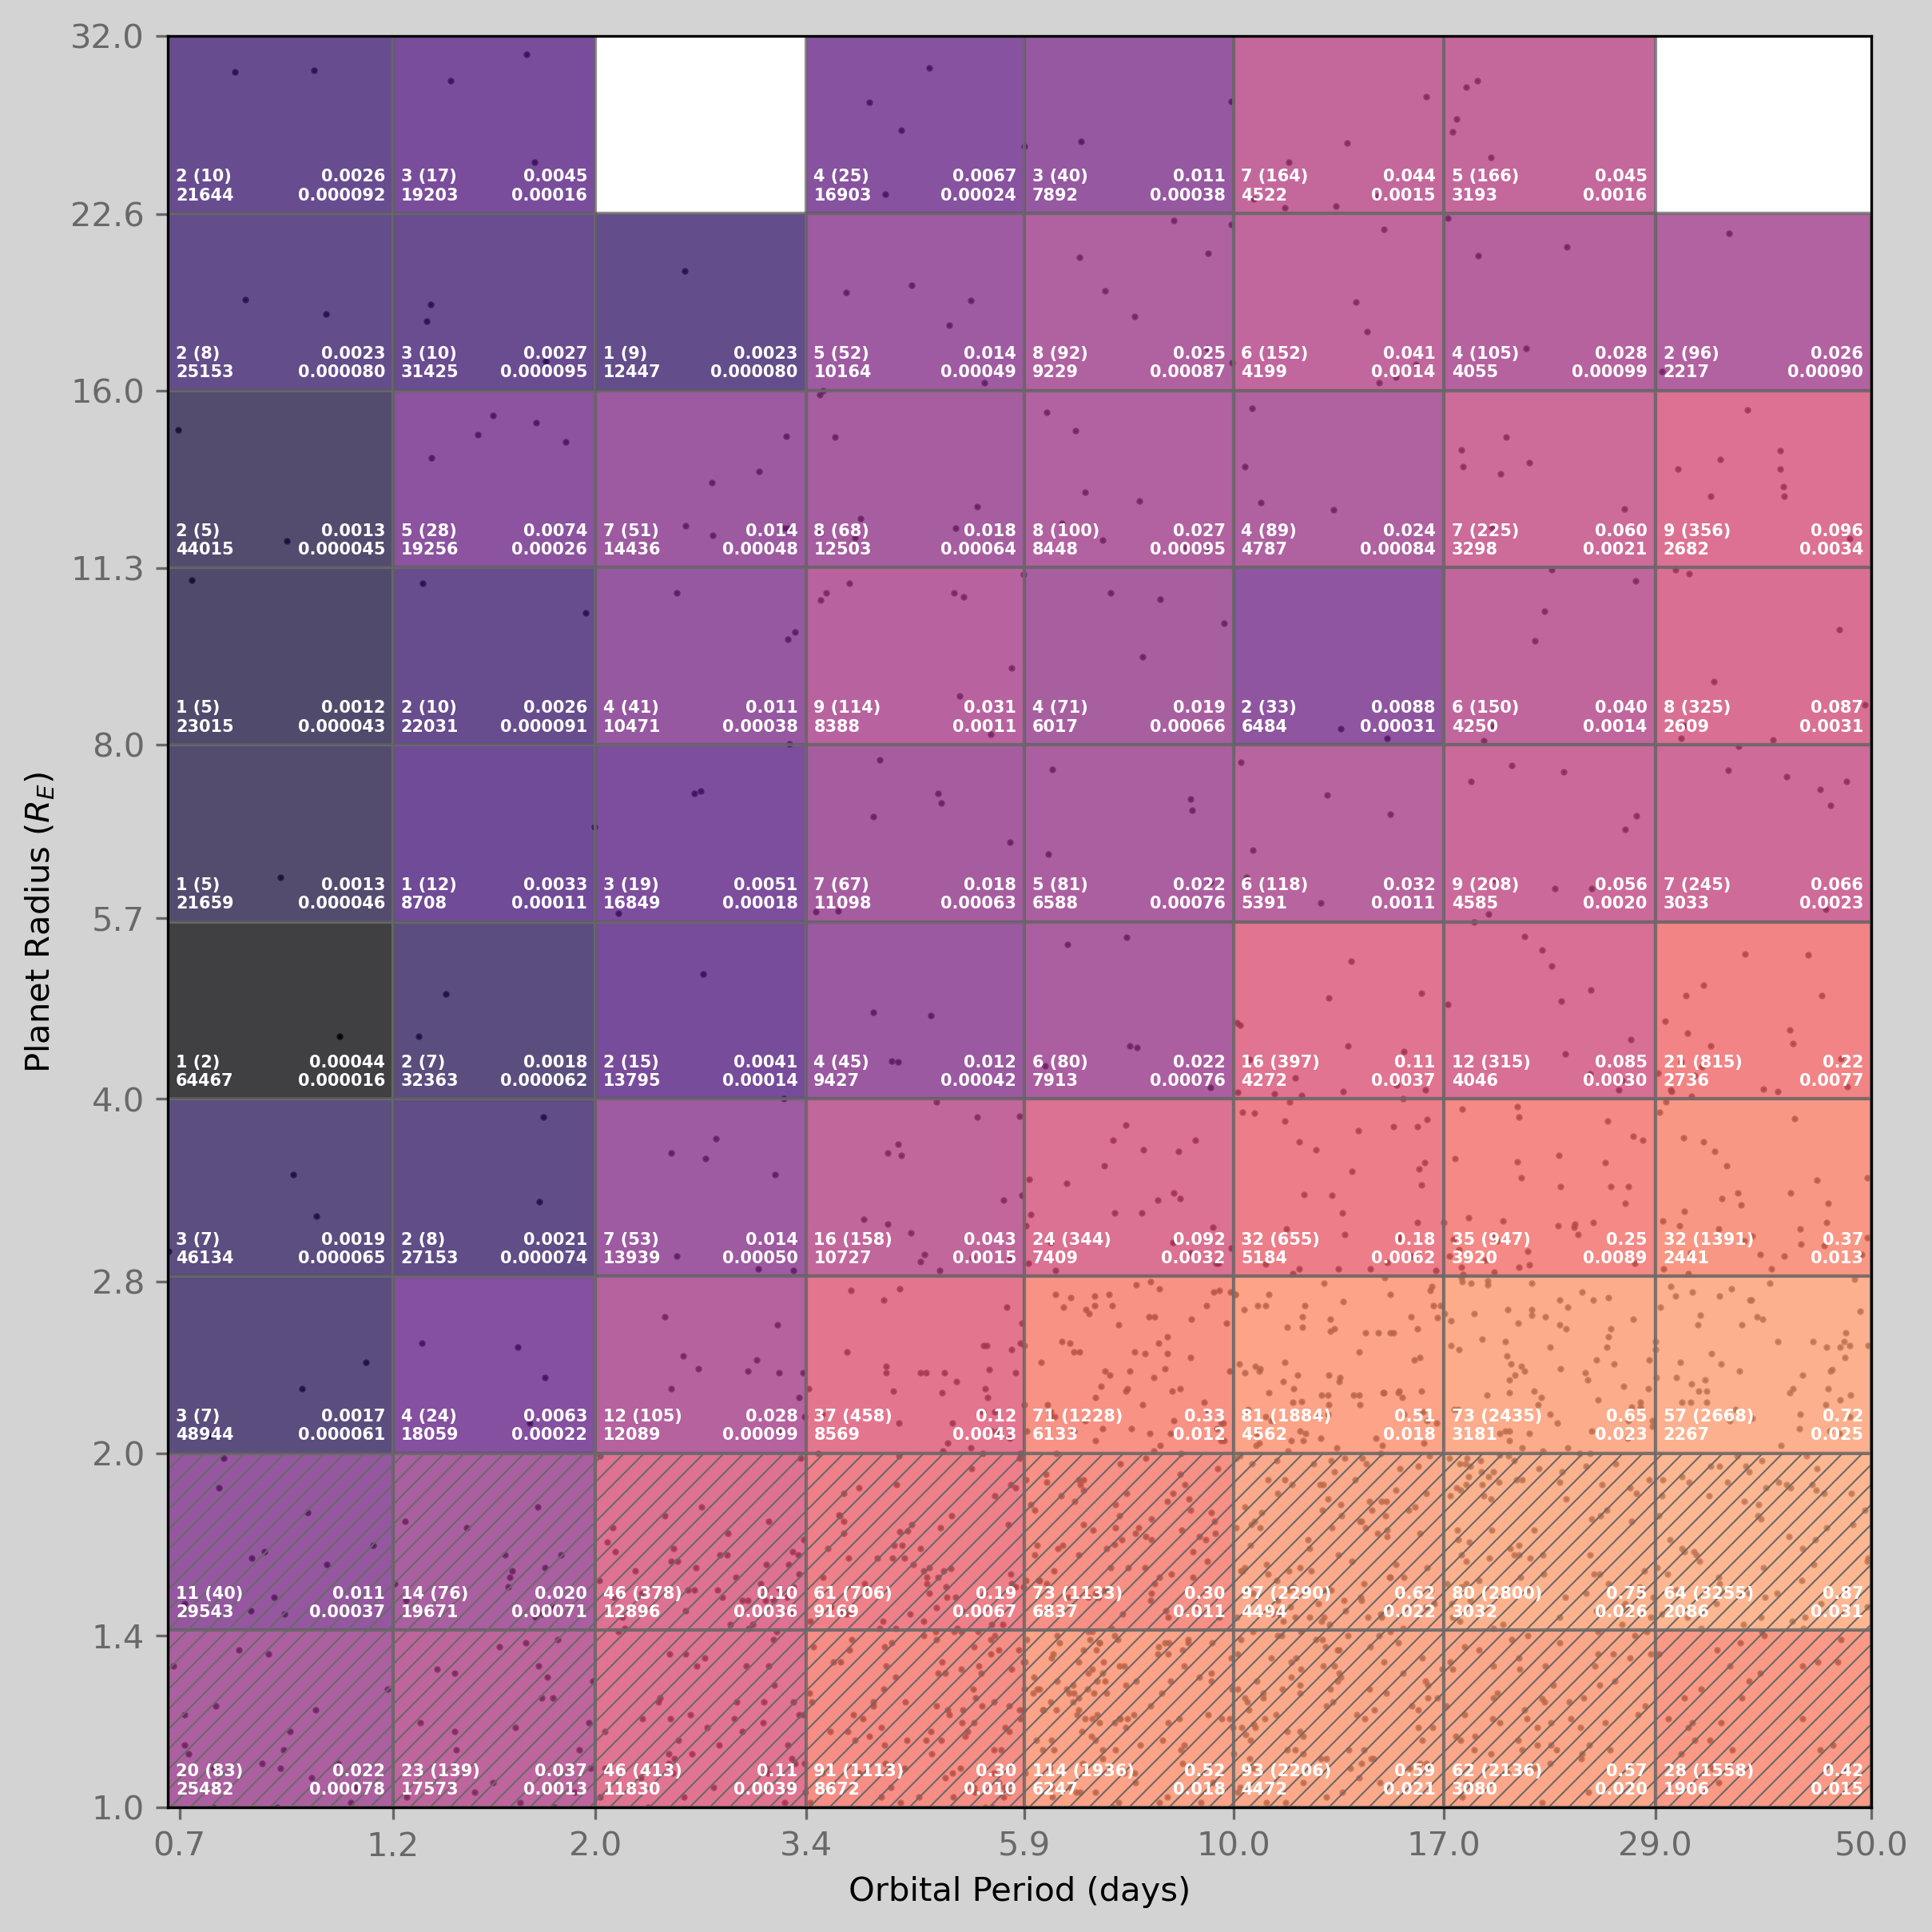

In [13]:
planet_rad = pd.concat((p_conf["pl_rade"],p_cand["koi_prad"]))
planet_per = pd.concat((p_conf["pl_orbper"],p_cand["koi_period"]))
planet_prob = 1./pd.concat(((p_conf["st_rad"]*0.00465047)/(p_conf["pl_orbsmax"]),(p_cand["koi_srad"]*0.00465047)/(p_cand["koi_sma"])))

perrange = np.array([0.68,1.2,2.0,3.4,5.9,10,17,29,50])
radrange = np.logspace(0,5,11,base=2)

fig,ax = plt.subplots(1,1,figsize = (8,8), dpi=300)
fig.set_facecolor("lightgray")
ax.set_xlabel("Orbital Period (days)")
ax.set_ylabel("Planet Radius ($R_E$)")

mask0 = (~np.isnan(planet_prob))&(~np.isnan(planet_per))&(~np.isnan(planet_rad))
plt.scatter(planet_per[mask0],planet_rad[mask0],s=1,color="black",alpha=0.75)

occurances = []
for i,perbin in enumerate(perrange[:-1]):
    for j,radbin in enumerate(radrange[:-1]):
        mask = (planet_per>=perrange[i])&(planet_per<perrange[i+1])&(~np.isnan(planet_prob))&(planet_rad>=radrange[j])&(planet_rad<radrange[j+1])&(~np.isnan(planet_per))&(~np.isnan(planet_rad))
        new_binned = planet_prob[mask]

        if len(new_binned)>0:
            planets = len(new_binned)
            planets_aug = np.round(np.sum(new_binned)).astype(int)
    
            fcell = np.sum(new_binned)/len(star)
            round__ = -1*(np.floor(np.log10(fcell)).astype(int)-1)
    
            stars = np.round(planets/fcell).astype(int)

            # occurance = fcell * (perrange[i+1]-perrange[i])*(radrange[j+1]-radrange[j])
            occurance = fcell * 28.5
            occurances.append(occurance)
            round_ = -1*(np.floor(np.log10(occurance)).astype(int)-1)
            
            # print(planet,planet_aug,stars,fcell,occurance)
            
            ax.text(perrange[i]*1.02,radrange[j]*1.02,'{} ({})\n{}'.format(planets,planets_aug,stars),
                    ha="left",va="bottom",color="white",size=5,weight="bold")
            ax.text(perrange[i+1]*0.98,radrange[j]*1.02,'{:.{}f}\n{:.{}f}'.format(occurance,round_,fcell,round__),
                    ha="right",va="bottom",color="white",size=5,weight="bold")

occurances = np.array(occurances)
occurances = np.log10(occurances)
occurances = (occurances-np.min(occurances))/(np.max(occurances)-np.min(occurances))*0.8
itr = 0
for i,perbin in enumerate(perrange[:-1]):
    for j,radbin in enumerate(radrange[:-1]):
        mask = (planet_per>=perrange[i])&(planet_per<perrange[i+1])&(~np.isnan(planet_prob))&(planet_rad>=radrange[j])&(planet_rad<radrange[j+1])
        new_binned = planet_prob[mask]
        
        if len(new_binned)>0:
            rect = patches.Rectangle((perrange[i],radrange[j]),
                                     perrange[i+1]-perrange[i],
                                     radrange[j+1]-radrange[j],
                                     edgecolor="dimgray",alpha=0.75,
                                     facecolor=plt.get_cmap("magma")(occurances[itr]))
            ax.add_patch(rect)
            itr += 1

matplotlib.rcParams['hatch.linewidth'] = 0.5
ax.axhspan(1,2,color="dimgray",hatch="////",fill=False,lw=0)

ax.set_xscale('log')
ax.set_xticks(np.round(perrange,1))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xlim(min(perrange),max(perrange))

ax.set_yscale('log')
ax.set_yticks(np.round(radrange,1))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ylim(min(radrange),max(radrange))

ax.minorticks_off()
ax.tick_params(colors='dimgrey', which='both')

plt.tight_layout(pad=0.5)
plt.savefig("4.png",dpi=500)
plt.show()

---